<a href="https://colab.research.google.com/github/Abhishekmalakar/ML-Model-Wine-Quality/blob/main/PCA_wine_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
dataset=pd.read_csv("/content/winequalityN.csv")

In [ ]:
dataset.head()


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
dataset.iloc[:,1:].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Boxplots by output labels/classes


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

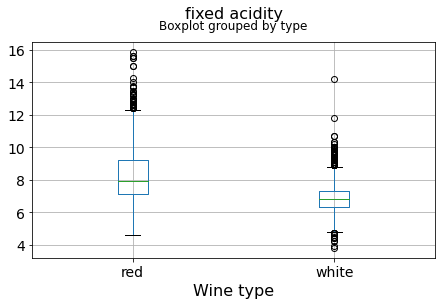

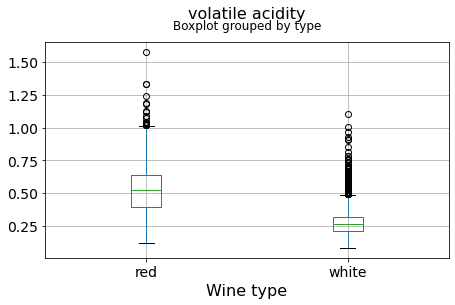

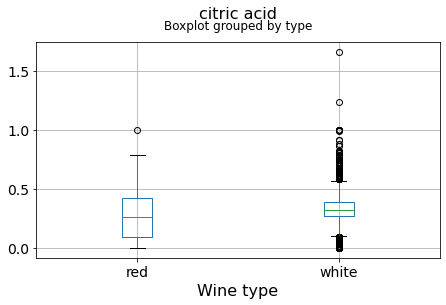

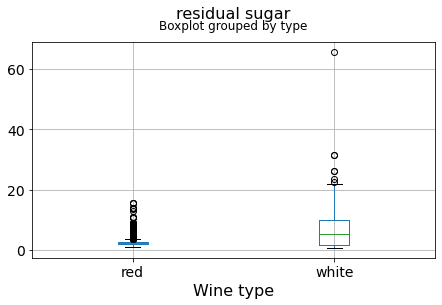

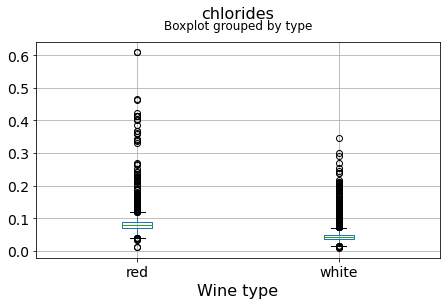

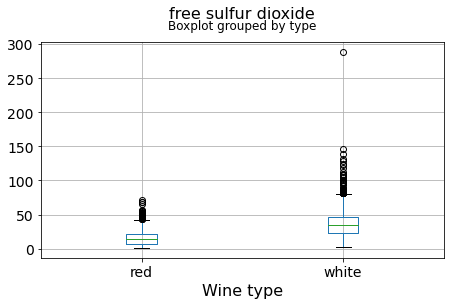

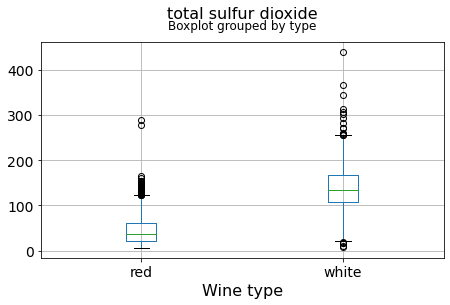

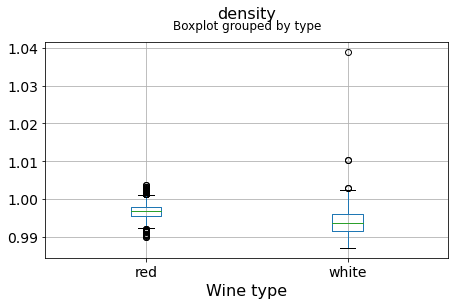

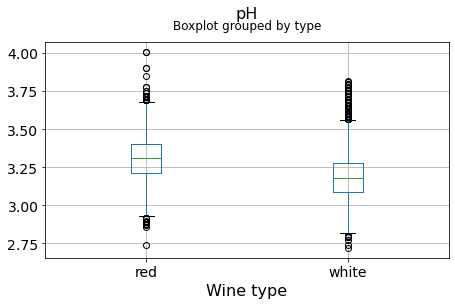

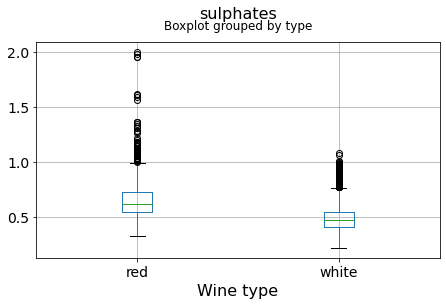

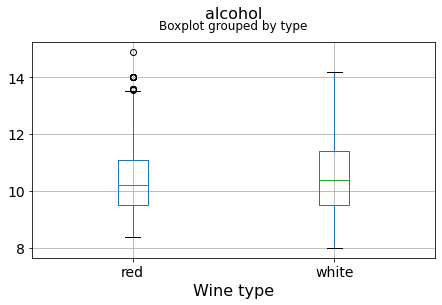

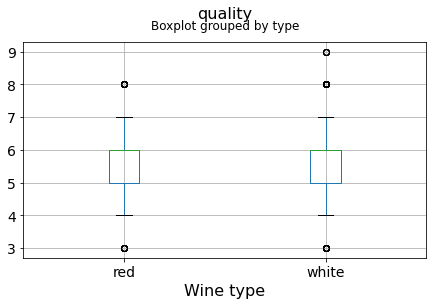

In [ ]:
for c in dataset.columns[1:]:
    dataset.boxplot(c,by='type',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("Wine type", fontsize=16)

Below is an example of class seperation using two variables

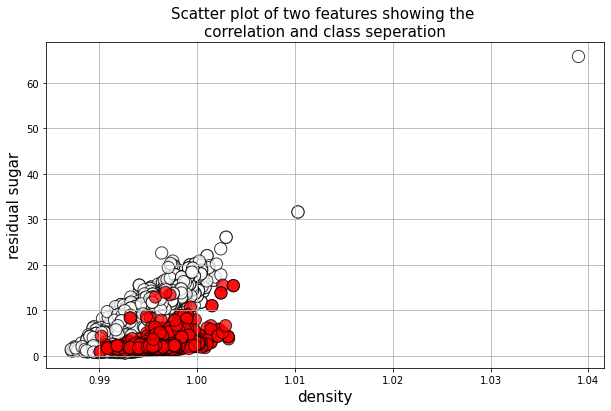

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(dataset['density'],dataset['residual sugar'],c=dataset['type'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Scatter plot of two features showing the \ncorrelation and class seperation",fontsize=15)
plt.xlabel("density",fontsize=15)
plt.ylabel("residual sugar",fontsize=15)
plt.show()

Are the features independent? Plot co-variance matrix
It can be seen that there are some good amount of correlation between features i.e. they are not independent of each other, as assumed in Naive Bayes technique. However, we will still go ahead and apply yhe classifier to see its performance.

---



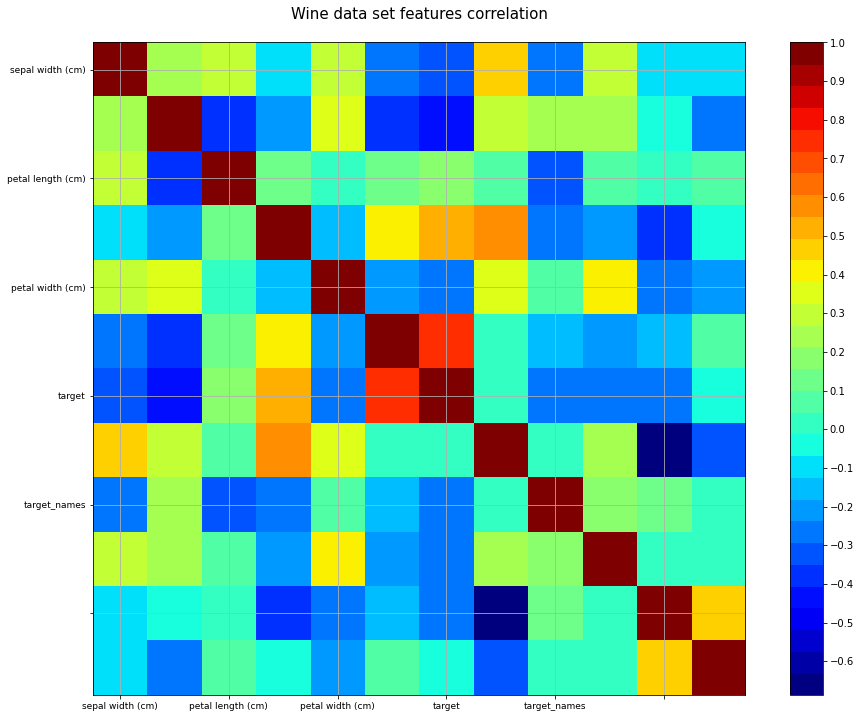

In [ ]:
def correlation_matrix(dataset):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(dataset.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Wine data set features correlation\n',fontsize=15)
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

correlation_matrix(dataset)


Data scaling
PCA requires scaling/normalization of the data to work properly

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
X = dataset.drop('type',axis=1)
y = dataset['type']

In [ ]:
X = scaler.fit_transform(X)



In [ ]:
datasetx = pd.DataFrame(data=X,columns=dataset.columns[1:])

In [ ]:
datasetx.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.167030,-0.423303,0.284180,3.206483,-0.315173,0.815565,0.959976,2.102214,-1.358722,-0.545791,-1.418558,0.207999
1,-0.706883,-0.241083,0.146489,-0.808012,-0.200996,-0.931107,0.287618,-0.232332,0.507693,-0.276979,-0.831615,0.207999
2,0.681310,-0.362563,0.559560,0.305958,-0.172452,-0.029599,-0.331660,0.134525,0.258838,-0.612994,-0.328521,0.207999
3,-0.012786,-0.666262,0.008799,0.642251,0.055902,0.928254,1.243074,0.301278,-0.176659,-0.881807,-0.496219,0.207999
4,-0.012786,-0.666262,0.008799,0.642251,0.055902,0.928254,1.243074,0.301278,-0.176659,-0.881807,-0.496219,0.207999
5,0.681310,-0.362563,0.559560,0.305958,-0.172452,-0.029599,-0.331660,0.134525,0.258838,-0.612994,-0.328521,0.207999
6,-0.784004,-0.119603,-1.092723,0.326976,-0.315173,-0.029599,0.358392,0.067824,-0.238873,-0.411385,-0.747766,0.207999
7,-0.167030,-0.423303,0.284180,3.206483,-0.315173,0.815565,0.959976,2.102214,-1.358722,-0.545791,-1.418558,0.207999
8,-0.706883,-0.241083,0.146489,-0.808012,-0.200996,-0.931107,0.287618,-0.232332,0.507693,-0.276979,-0.831615,0.207999
9,0.681310,-0.727002,0.766095,-0.829030,-0.343718,-0.142287,0.234537,-0.299033,0.009982,-0.545791,0.426120,0.207999


In [ ]:
datasetx.isnull().sum()

fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
datasetx.fillna(0,inplace=True)


In [ ]:
datasetx.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03
mean,6.596061e-17,-2.607687e-15,1.201987e-16,-8.497726e-16,-1.546665e-15,-5.712086e-16,-8.278911e-16,-3.146646e-15,1.871504e-15,-1.548195e-15,-1.427842e-15,6.450811e-19
std,9.993070e-01,9.994611e-01,9.998460e-01,9.999230e-01,9.999230e-01,1.000077e+00,1.000077e+00,1.000077e+00,9.993840e-01,9.997691e-01,1.000077e+00,1.000077e+00
min,-2.634928e+00,-1.577361e+00,-2.194244e+00,-1.018195e+00,-1.342766e+00,-1.663583e+00,-1.941780e+00,-2.530192e+00,-3.100710e+00,-2.091462e+00,-2.089350e+00,-3.227687e+00
25%,-6.297608e-01,-6.662625e-01,-4.731166e-01,-7.659755e-01,-5.149831e-01,-7.620742e-01,-6.855323e-01,-7.859527e-01,-6.743701e-01,-6.801972e-01,-8.316152e-01,-9.372296e-01
50%,-1.670299e-01,-3.018229e-01,-6.004599e-02,-5.137559e-01,-2.580848e-01,-8.594301e-02,3.990667e-02,6.448888e-02,-5.223163e-02,-1.425724e-01,-1.608231e-01,2.079990e-01
75%,3.728228e-01,3.663164e-01,4.907148e-01,5.581775e-01,2.557116e-01,5.901882e-01,7.122647e-01,7.648525e-01,6.321207e-01,4.622555e-01,6.776670e-01,2.079990e-01
max,6.696812e+00,7.533628e+00,9.234043e+00,1.268574e+01,1.584087e+01,1.456357e+01,5.737257e+00,1.476879e+01,4.924876e+00,9.870689e+00,3.696231e+00,3.643685e+00


PCA class import and analysis

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=None)

In [ ]:
datasetx_pca = pca.fit(datasetx)

Plot the explained variance ratio

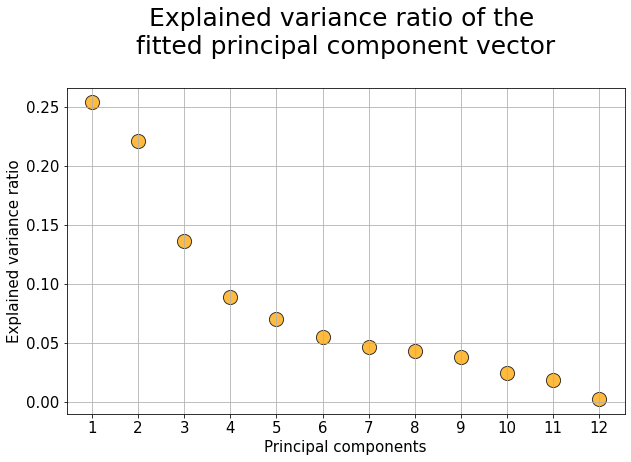

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(datasetx_pca.explained_variance_ratio_))],
            y=datasetx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(datasetx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

The above plot means that the 
 principal component explains about 36% of the total variance in the data and the 
 component explians further 20%. Therefore, if we just consider first two components, they together explain 56% of the total variance.

Showing better class separation using principal components
Transform the scaled data set using the fitted PCA object

In [ ]:
datasetx_trans = pca.transform(datasetx)

Put it in a data frame

In [ ]:
datasetx_trans = pd.DataFrame(data=datasetx_trans)
datasetx_trans.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11
0,2.525266,3.142786,-0.108355,0.090120,1.911995,0.388136,-0.584928,0.134094,0.600643,0.024113,0.257972,0.077253
1,-0.086996,-0.473336,-0.420095,-0.162653,-0.375950,-0.827838,-0.826721,0.100160,-0.374997,-1.051194,-0.359561,0.126110
2,0.185997,0.289595,0.529435,-0.231909,0.451890,-0.636901,-0.157603,-0.498070,-0.482627,0.180602,0.141820,-0.366129
3,1.757648,0.717850,-0.212502,0.083673,0.001179,0.211173,-0.146506,-0.375780,-0.580713,0.192764,-0.466081,0.004523
4,1.757648,0.717850,-0.212502,0.083673,0.001179,0.211173,-0.146506,-0.375780,-0.580713,0.192764,-0.466081,0.004523
5,0.185997,0.289595,0.529435,-0.231909,0.451890,-0.636901,-0.157603,-0.498070,-0.482627,0.180602,0.141820,-0.366129
6,0.678936,0.033192,-1.121778,-0.219373,0.439008,0.339480,-0.615062,0.607763,-0.278887,-0.276321,-0.107757,0.043975
7,2.525266,3.142786,-0.108355,0.090120,1.911995,0.388136,-0.584928,0.134094,0.600643,0.024113,0.257972,0.077253
8,-0.086996,-0.473336,-0.420095,-0.162653,-0.375950,-0.827838,-0.826721,0.100160,-0.374997,-1.051194,-0.359561,0.126110
9,0.299920,-0.652031,1.078344,-0.390353,-0.326601,-0.632283,0.214221,-0.336332,-0.606527,0.064037,-0.402457,0.207004


Plot the first two columns of this transformed data set with the color set to original ground truth class label

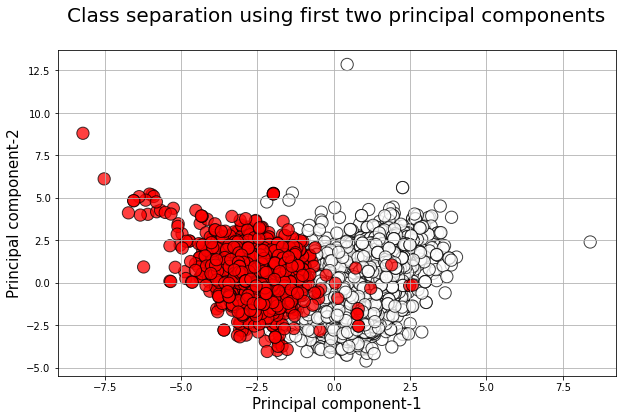

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(datasetx_trans[0],datasetx_trans[1],c=dataset['type'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()